# Scan the Code Project
This is just a test notebook to try out features of opencv with color recognition<br>
__Make sure to run this notebook with opencv2 environment__

In [1]:
import numpy as np
import cv2
import argparse
from matplotlib import pyplot as plt
%matplotlib inline

Define the RGB thresholds for what RED, BLUE, and GREEN specifically are. Describe upper and lower bound using python dictionary.

In [2]:
# define the lower and upper boundaries of the colors in the HSV color space
lower = {'red':(166, 84, 141), 'green':(66, 122, 129), 'blue':(97, 100, 117), 'yellow':(23, 59, 119), 'orange':(0, 50, 80)} #assign new item lower['blue'] = (93, 10, 0)
upper = {'red':(186,255,255), 'green':(86,255,255), 'blue':(117,255,255), 'yellow':(54,255,255), 'orange':(20,255,255)}

In [3]:
lower

{'blue': (97, 100, 117),
 'green': (66, 122, 129),
 'orange': (0, 50, 80),
 'red': (166, 84, 141),
 'yellow': (23, 59, 119)}

In [4]:
upper

{'blue': (117, 255, 255),
 'green': (86, 255, 255),
 'orange': (20, 255, 255),
 'red': (186, 255, 255),
 'yellow': (54, 255, 255)}

In [5]:
# define standard colors for circle around the object
colors = {'red':(0,0,255), 'green':(0,255,0), 'blue':(255,0,0), 'yellow':(0, 255, 217), 'orange':(0,140,255)}
colors

{'blue': (255, 0, 0),
 'green': (0, 255, 0),
 'orange': (0, 140, 255),
 'red': (0, 0, 255),
 'yellow': (0, 255, 217)}

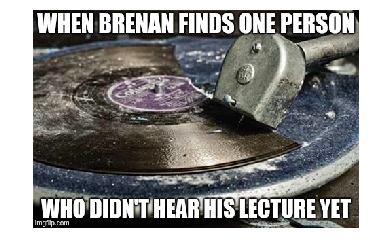

In [6]:
img = cv2.imread('images/image.png')
# cv2.imshow('image', img)
plt.axis('off')
plt.imshow(img)

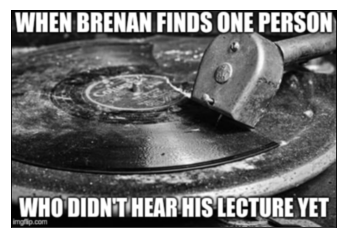

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

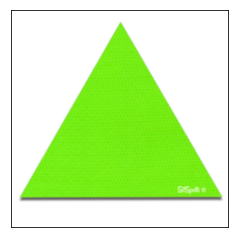

In [8]:
green_triangle = cv2.imread('images/green_triangle.png')
plt.imshow(green_triangle, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [138]:
from matplotlib.patches import Circle

def plot_multiple(image_list):
    col = len(image_list)
    row = 1
        
    fig, ax = plt.subplots(row,col, figsize=(16,8))
    for i in range(len(ax)):
        ax[i].axis('off')
        ax[i].imshow(images[i])
        
    plt.show()
    
def plot_color_recognition(image_list, x, y, radius):
    col = len(image_list)
    row = 1
        
    fig, ax = plt.subplots(row,col, figsize=(16,8))
    for i in range(len(ax)):
        ax[i].axis('off')
        ax[i].imshow(images[i])
        if i == 2:
            circ = Circle((x,y),radius, fill = False, linewidth = 4, color = 'r')
            ax[i].add_patch(circ)
        
    plt.show()

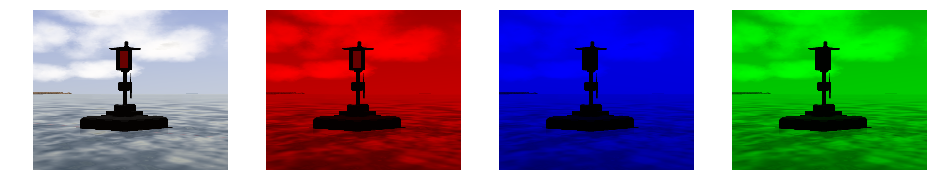

In [9]:
red_buoy = cv2.imread('images/Red_rgb.png')
red_buoy = cv2.cvtColor(red_buoy, cv2.COLOR_BGR2RGB)
I_red = red_buoy.copy()  # Duplicate image
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0    # Zero out contribution from blue

I_green = red_buoy.copy()  # Duplicate image
I_green[:, :, 0] = 0    # Zero out contribution from red
I_green[:, :, 2] = 0    # Zero out contribution from blue

I_blue = red_buoy.copy()  # Duplicate image
I_blue[:, :, 1] = 0    # Zero out contribution from green
I_blue[:, :, 0] = 0    # Zero out contribution from red

fig, axarr = plt.subplots(1,4, figsize=(16,8))

images = [red_buoy, I_red, I_blue, I_green]
i = 0
for item in axarr:
    item.axis('off')
    item.imshow(images[i])
    i += 1
    

plt.show()

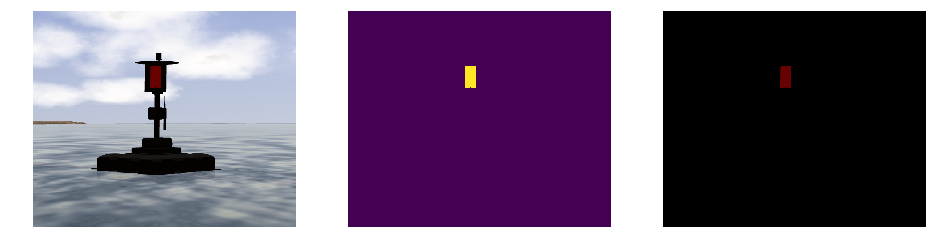

In [123]:
red_buoy = cv2.imread('images/Red_rgb.png')
red_buoy_hsv = cv2.cvtColor(red_buoy, cv2.COLOR_BGR2HSV)

lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])

mask = cv2.inRange(red_buoy_hsv, lower_red, upper_red)
res = cv2.bitwise_and(red_buoy_hsv, red_buoy_hsv, mask = mask)


fig, axarr = plt.subplots(1,3, figsize=(16,8))

red_buoy_plot = cv2.cvtColor(red_buoy, cv2.COLOR_BGR2RGB)
# mask_plot = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
res_plot = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)

images = [red_buoy_plot, mask, res_plot]
i = 0
for item in axarr:
    item.axis('off')
    item.imshow(images[i])
    i += 1

plt.show()

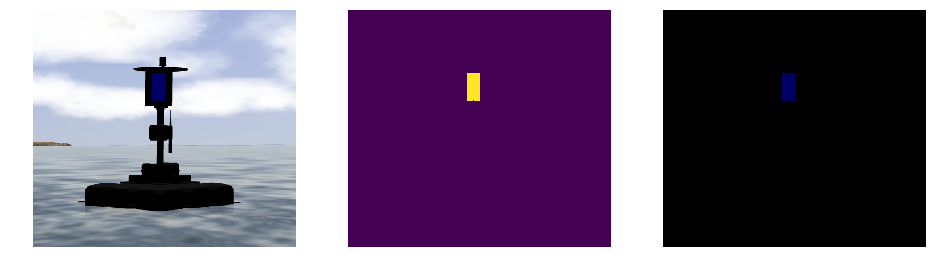

In [126]:
blue_buoy = cv2.imread('images/Blue_rgb.png')
blue_buoy_hsv = cv2.cvtColor(blue_buoy, cv2.COLOR_BGR2HSV)

lower_blue = np.array([115,50,50])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(blue_buoy_hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(blue_buoy_hsv, blue_buoy_hsv, mask = mask)

blue_buoy_plot = cv2.cvtColor(blue_buoy, cv2.COLOR_BGR2RGB)
# mask_plot = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
res_plot = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)

images = [blue_buoy_plot, mask, res_plot]
plot_multiple(images)

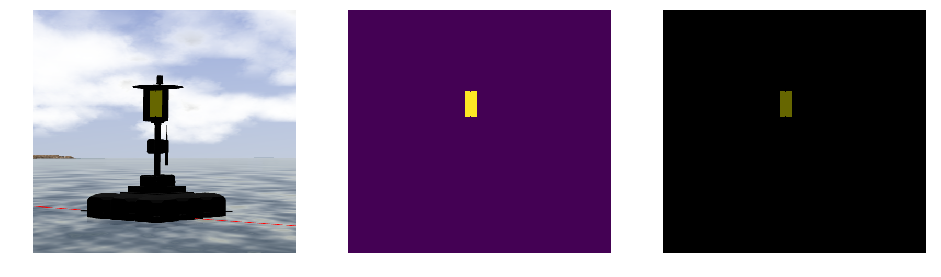

In [127]:
yellow_buoy = cv2.imread('images/Yellow_rgb.png')
yellow_buoy_hsv = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20,100,100])
upper_yellow = np.array([30,255,255])

mask = cv2.inRange(yellow_buoy_hsv, lower_yellow, upper_yellow)
res = cv2.bitwise_and(yellow_buoy_hsv, yellow_buoy_hsv, mask = mask)


# fig, axarr = plt.subplots(1,3, figsize=(16,8))

yellow_buoy_plot = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2RGB)
# mask_plot = cv2.cvtColor(mask, cv2.COLOR_HSV2RGB)
res_plot = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)

images = [yellow_buoy_plot, mask, res_plot]
plot_multiple(images)

(234.5, 179.0)


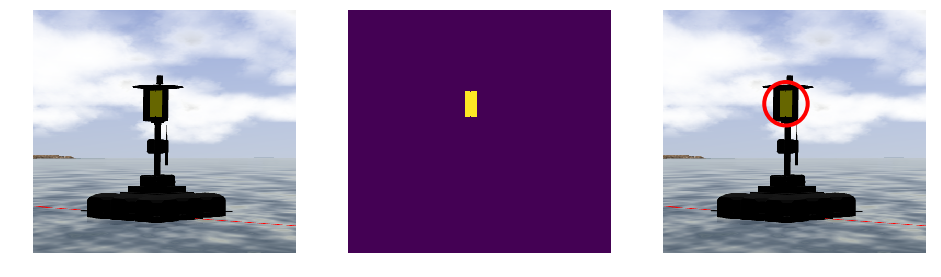

In [136]:
from matplotlib.patches import Circle

yellow_buoy = cv2.imread('images/Yellow_rgb.png')
yellow_buoy_hsv = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20,100,100])
upper_yellow = np.array([30,255,255])

mask = cv2.inRange(yellow_buoy_hsv, lower_yellow, upper_yellow)
res = cv2.bitwise_and(yellow_buoy_hsv, yellow_buoy_hsv, mask = mask)

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[-2]
if len(cnts) > 0:
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    c = max(cnts, key=cv2.contourArea)

    ((x, y), radius) = cv2.minEnclosingCircle(c)
    print(x, y)
    M = cv2.moments(c)
    radius += 15

yellow_buoy = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2RGB)
images = [yellow_buoy, mask, yellow_buoy]

plot_color_recognition(images, x, y, radius)

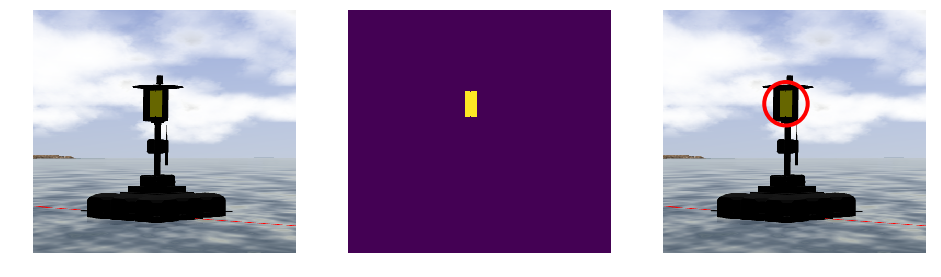

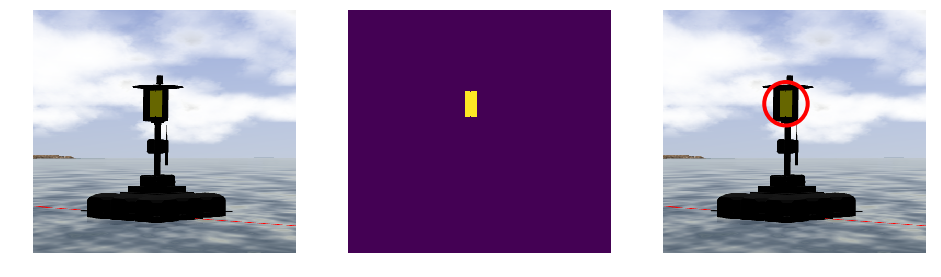

In [137]:
import time

# lower_threshold = {"red": lower_red,"blue": lower_blue, "yellow": lower_yellow}
# upper_threshold = {"red": upper_red,"blue": upper_blue, "yellow": upper_yellow}
# colors = {'red':(0,0,255), 'blue':(255,0,0), 'yellow':(0, 255, 217)}

colors_identified = []
image_feed["yellow", "red", "blue", "none", ]

def color_recognition(image):
    lower_threshold = {"red": lower_red,"blue": lower_blue, "yellow": lower_yellow}
    upper_threshold = {"red": upper_red,"blue": upper_blue, "yellow": upper_yellow}
    mask = cv2.inRange(yellow_buoy_hsv, lower_yellow, upper_yellow)
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[-2]
    
    buoy_hsv = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2HSV)
    
    if len(cnts) > 0:
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
        c = max(cnts, key=cv2.contourArea)

        ((x, y), radius) = cv2.minEnclosingCircle(c)
        # print(x, y)
        M = cv2.moments(c)
        radius += 15
    
    return [buoy_plot, mask, buoy_plot,], x, y, radius, color_id

plot_color_recognition(images, x, y, radius)

time.sleep(2)
plot_color_recognition(images, x, y, radius)

time.sleep(2)
plot_color_recognition(images, x, y, radius)

for img in image_feed:

    time.sleep(2)
    plot_color_recognition(images, x, y, radius)
        